# <center><font color='red' face='comic sans ms'> Salary Prediction</font></center>

<b>Problem statement: </b> we have a Given data set capturing gross salary from July 1, 2013 to June 30, 2014 which includes only those employees who were employed on June 30, 2014. Predict the Salaries for Employees in Blatimore</b>

# solution
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [1]:
#libraries from analysis
import numpy as np
import pandas as pd

#libraries for visualization
import matplotlib.pyplot as plt
#matplot online
import seaborn as sb

In [2]:
#libraries for train test split
from sklearn.model_selection import train_test_split

#library for scaling
from sklearn.preprocessing import StandardScaler


#library for model building 
from sklearn.linear_model import LinearRegression

#warning supreession
import warnings
warnings.filterwarnings('ignore')

#<font color='blue' face='cursue'> importing dataset</font></center>

Dataset is of csv format so can be imported using read_csv method from pandas library & we'll check whether the Dataset is correctly imported by checking its top 5 rows.

In [3]:
#importing Dataset
salary_org = pd.read_csv("/content/train.csv")

#printing its top 5 rows
salary_org.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


#<font color='**dark**' face='cursue'>Data Cleaning and Data Preparation</font></center>

In [4]:
salary_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


- <font color = 'Blue'> There are 18981 rows  and 7 columns of object type in the data set</font>
 

<font color='red'>As Its a good practice to work on [copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html) of data set instead of the Original Data set.</font>

In [5]:
#creating copy of Dataset
salary_cpy=salary_org.copy()

#checking column names
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

<font color='red'> there is a leading space in Name we'll have to remove it.</font>

In [6]:
# removing leading spaces 
salary_cpy.columns=salary_cpy.columns.str.strip()

#checking columns again..!!
print("after removing leading and training space's",salary_cpy.columns)


after removing leading and training space's Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')


[Check Null](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) : Treating Null Values. 

In [7]:
#checking for null values
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

There are 70 null values in HireDate which are comparitively less so its benificial to drop these rows.

In [8]:
#remving null Hiredate rows
salary_cpy = salary_cpy.dropna(subset=["HireDate"])

#checking null values again..!!
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

<font color = 'Blue'> we have treated null values of Hiredate columns.</font><font color = 'Green'> Gross Pay & Annual salary are dependent variables. so to use only one of them is useful. As we have so much null values in Grosspay column [dropping that column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) is must</font>

In [9]:
#dropping Grosspay column
salary_cpy = salary_cpy.drop("GrossPay",axis=1)

#checking null values 
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

**checking value counts**

In [10]:
#checking values count of agencyID
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02526      1
A65052      1
W02696      1
W02442      1
A65021      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1177 agencies As AgencyID represents an Agency, so may be same number of agencies can be present. try to check it

In [11]:
#checking values count of agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
HLTH-Health Dept Locatio       6
Council Services               6
Legislative Reference          5
Special City Services          4
M-R Cable & Comm               4
Name: Agency, Length: 65, dtype: int64

it looks like single agency have multiple agency ids dependings on job type and agency

In [12]:
#checking values count of JoobTitle
salary_cpy.JobTitle.value_counts()


AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
FINGERPRINT SECTION MANAGER          1
SPECIAL ASST DIRECTOR OF PUBLI       1
DIRECTOR OPERATION SAFE KIDS         1
COMMUNICATIONS SERVCS SUPV           1
Senior Fire Operations Aide          1
Name: JobTitle, Length: 1073, dtype: int64

There are **1073** Job title that are available

In [13]:
#checking values count of HireDate
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
12/08/1987       1
03/21/1989       1
03/25/2003       1
02/15/2007       1
03/31/1975       1
Name: HireDate, Length: 4737, dtype: int64

- <font color = 'Blue'> Most people are selected on 05/21/2014 of format MM/DD/YYYY </font>

In [14]:
#checking values count of Annual Salary
salary_cpy.AnnualSalary.value_counts()

$11310.00     4811
$20800.00      325
$29245.00      196
$43999.00      169
$44773.00      162
              ... 
$81795.00        1
$61953.00        1
$82700.00        1
$137700.00       1
$51399.00        1
Name: AnnualSalary, Length: 1590, dtype: int64

Annaul Salary is in form of **dollar** we have to convert it into **integer** format

In [15]:
#removing $ from annual salary to convert it to the integer format
salary_cpy["AnnualSalary"]=salary_cpy["AnnualSalary"].apply(lambda x : (float)(str(x)[1:]))

#value count of annual salary
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
35509.0       1
25945.0       1
51889.0       1
39600.0       1
86400.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [16]:
#break Date into Yearr ,Month and Dayt
salary_cpy["HireDay"]=salary_cpy["HireDate"].apply(lambda x : (int)(str(x[3:5])))
salary_cpy["HireMonth"]=salary_cpy["HireDate"].apply(lambda x : (int)(str(x[0:2])))
salary_cpy["HireYear"]=salary_cpy["HireDate"].apply(lambda x : (int)(str(x[6:])))

#check whether the columns are added
salary_cpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18911 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18911 non-null  object 
 1   JobTitle      18911 non-null  object 
 2   AgencyID      18911 non-null  object 
 3   Agency        18911 non-null  object 
 4   HireDate      18911 non-null  object 
 5   AnnualSalary  18911 non-null  float64
 6   HireDay       18911 non-null  int64  
 7   HireMonth     18911 non-null  int64  
 8   HireYear      18911 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 1.4+ MB


In [17]:
#removing spaces
salary_cpy["JobTitle"]=salary_cpy["JobTitle"].apply(lambda x :str(x).strip().replace(" "," "))
salary_cpy["AgencyID"]=salary_cpy["AgencyID"].apply(lambda x :str(x).strip().replace(" "," "))
salary_cpy["Agency"]=salary_cpy["Agency"].apply(lambda x :str(x).strip().replace(" "," "))

whereas some job titles,Agency and AgencyID are in Upper case.mix of upper and lower case column names might effect analysis,its better to convert them all to uppercase.

In [18]:
salary_cpy["JobTitle"]=salary_cpy["JobTitle"].apply(lambda x :str(x).upper())
salary_cpy["AgencyID"]=salary_cpy["AgencyID"].apply(lambda x :str(x).upper())
salary_cpy["Agency"]=salary_cpy["Agency"].apply(lambda x :str(x).upper())

**outlier treatment by Box plot**

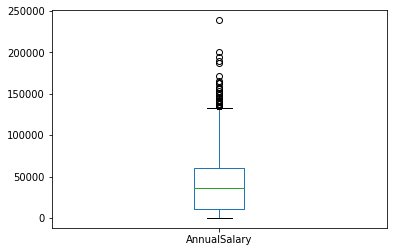

In [19]:
#checking outliers for Annual salary
salary_cpy.AnnualSalary.plot.box()
plt.show()

There are few Salaries which arent matching to other Salaries.which might effect prediction. So we have to eliminate them

In [20]:
#summary of Annual salary
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

The max value way more than mean , median .

In [21]:
#deleting rows whose annual salary> 1500000 according to box plot
salary_cpy=salary_cpy[salary_cpy["AnnualSalary"]<150000]
salary_cpy.shape

(18895, 9)

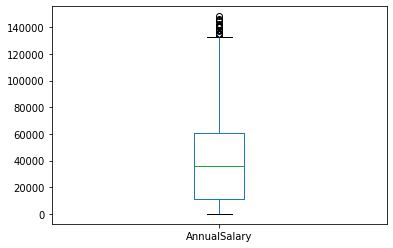

In [22]:
#creating Box plot for Annual salary
salary_cpy.AnnualSalary.plot.box()
plt.show()

All the data points above  **75%** line are very close to each other so let them be now.

## <font color='Magenta' face='Cursive'>Exploratory Data Analysis</font>

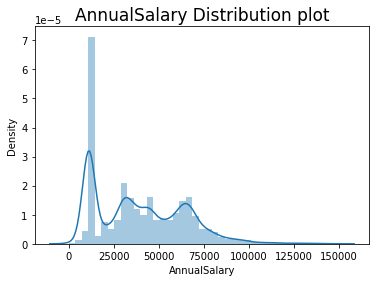

In [23]:
#checking distribution of Target variable
sb.distplot(salary_cpy.AnnualSalary)
plt.title("AnnualSalary Distribution plot",fontsize=17)
plt.show()

- <font color='Blue' face='Calibri'> The randomly distributed data seems to be of less people with >100000 salary  </font>

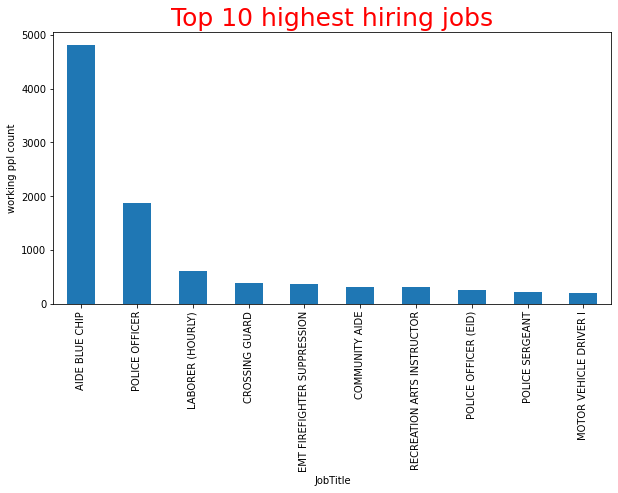

In [24]:
#Top 10 Jobs based on Hirings
plt.figure(figsize=(10,5))
salary_cpy.groupby(["JobTitle"])["Name"].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("working ppl count")
plt.title("Top 10 highest hiring jobs",fontsize=25,color="red")
plt.show()

- most number of People works as AIDE BLUE CHIP which  has over double than workers at POLICE OFFICER (second Highest)
- else every Job is haviing less than 1000 Workers 

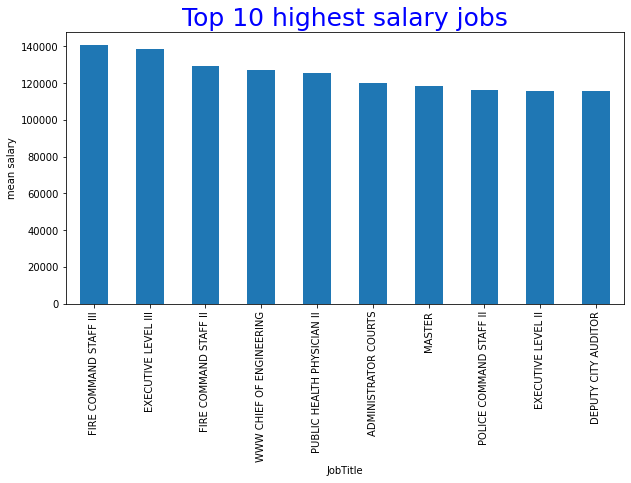

In [25]:
#Top 10 Jobs that fetche highest Salary
plt.figure(figsize=(10,5))
salary_cpy.groupby(["JobTitle"])["AnnualSalary"].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("mean salary")
plt.title("Top 10 highest salary jobs",fontsize=25,color="blue")
plt.show()

every job of above graph has hiest salary rate

<font color='Brown'> Number of Jobs whose average pay is more thatn total average salary</font>**bold text**

In [26]:
#find mean salary
mean_salary=salary_cpy.AnnualSalary.mean() 

# Number of Jobs paying more than mean salary
highest_paying_jobs=salary_cpy.groupby(["JobTitle"])["AnnualSalary"].mean().reset_index()
highest_paying_jobs[highest_paying_jobs.AnnualSalary>mean_salary]["JobTitle"].count()

798

- Out of 1073 Jobs 798 Jobs pay more than total average Salary

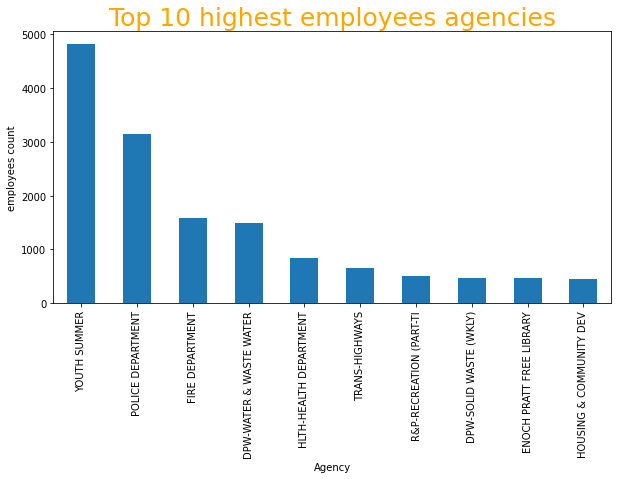

In [27]:
#Top 10 Agencies that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(["Agency"])["Name"].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("employees count")
plt.title("Top 10 highest employees agencies",fontsize=25,color="orange")
plt.show()

- The Youth Summer has maximum number of employees followed by Police Department

- Fire Department and DPW - Water & Waste Water has almost same number of employees

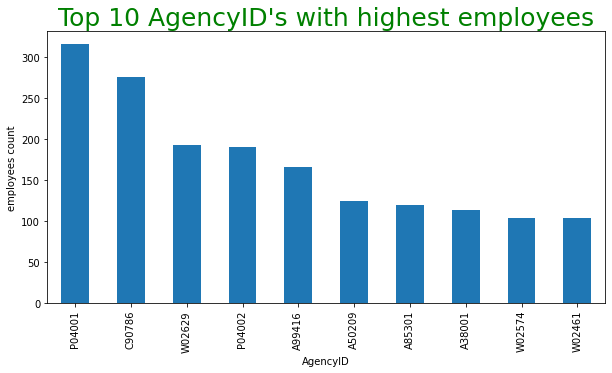

In [28]:
#Top 10 Jobs that has highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(["AgencyID"])["Name"].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("employees count")
plt.title("Top 10 AgencyID's with highest employees",fontsize=25,color="green")
plt.show()

The P04001 has maximum number of employees followed by C90786

<font color = 'Blue' >check if as the Hire Year increases the Salary decreases.Salary should be high for high experienced people. </font>

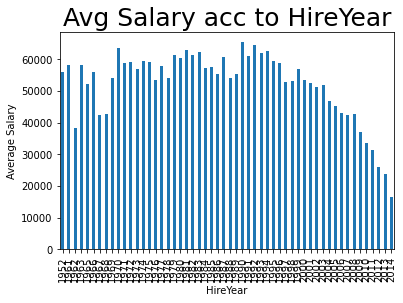

In [29]:
#salary vs HireYearplt.figure(figsize=(10,5))
salary_cpy.groupby(["HireYear"])["AnnualSalary"].mean().plot.bar()
plt.ylabel("Average Salary")
plt.title("Avg Salary acc to HireYear",fontsize=25)
plt.show()

- salary of employees **increases** with experience in company

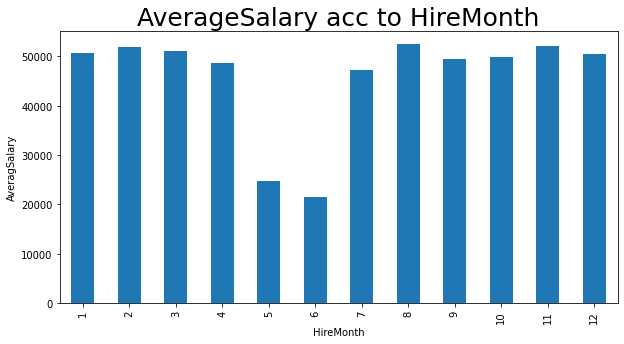

In [30]:
#chgecking Hiring acc HireMonth
plt.figure(figsize=(10,5))
salary_cpy.groupby(["HireMonth"])["AnnualSalary"].mean().plot.bar()
plt.ylabel("AveragSalary")
plt.title("AverageSalary acc to HireMonth",fontsize=25)
plt.show()

- distribution is same in every month except for 5th and 6th may be hiring in those months is less

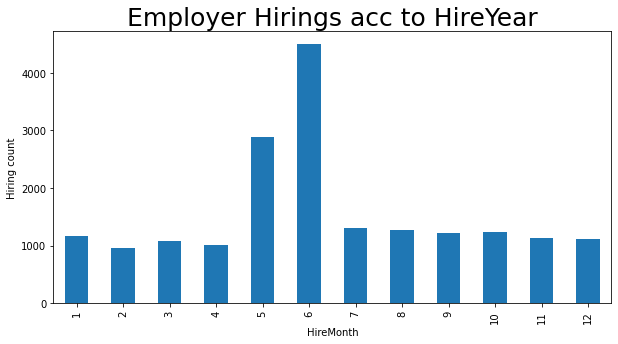

In [31]:
#checking month in which most people are hired
plt.figure(figsize=(10,5))
salary_cpy.groupby(["HireMonth"])["Name"].count().plot.bar()
plt.ylabel("Hiring count")
plt.title("Employer Hirings acc to HireYear",fontsize=25)
plt.show()

- most people are being hired in may and june months but there salary is low compared to other employees

<Figure size 1080x1440 with 0 Axes>

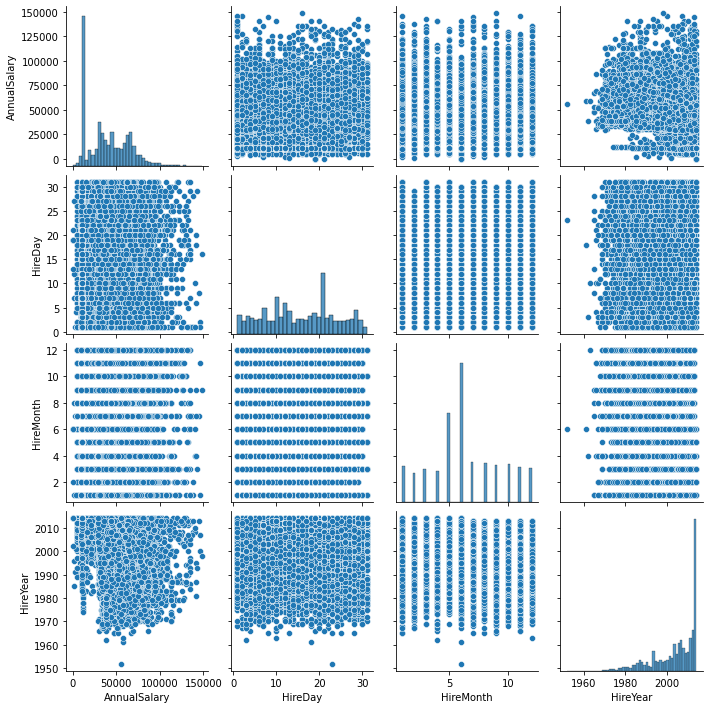

In [32]:
#plot a pairplot 
plt.figure(figsize=(15,20))
sb.pairplot(salary_cpy)
plt.show()

there isn't any correlation between numerical variables

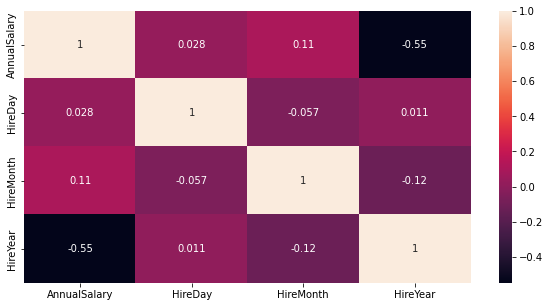

In [33]:
#plot a heattmap
plt.figure(figsize=(10,5))
sb.heatmap(salary_cpy.corr(),annot=True)

except for Hireyear nothing is having any correlation with Annual salary

## <font color='Magenta'> Feature Engineering</font>

&nbsp; <font color='Black' face='cursive'> Linear Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called [feature encoding](https://medium.com/analytics-vidhya/different-type-of-feature-engineering-encoding-techniques-for-categorical-variable-encoding-214363a016fb). 
 we will be using **mean encoding** as number of categorical variables are very high.</font>
 

In [34]:
# create a copy of DataFrame
salary_master=salary_cpy.copy()

#apply mean encoding for JobTitle
mean_Job=salary_master.groupby(["JobTitle"])["AnnualSalary"].mean()
salary_master["JobTitle"]=salary_master["JobTitle"].map(mean_Job)
print(salary_master["JobTitle"])

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18895, dtype: float64


In [35]:
#apply mean encoding for Agency
mean_agency=salary_master.groupby(["Agency"])["AnnualSalary"].mean()
salary_master["Agency"]=salary_master["Agency"].map(mean_agency)
print(salary_master["Agency"])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: Agency, Length: 18895, dtype: float64


In [36]:
#apply mean encoding for AgencyID
mean_agencyID=salary_master.groupby(["AgencyID"])["AnnualSalary"].mean()
salary_master["AgencyID"]=salary_master["AgencyID"].map(mean_agencyID)
print(salary_master["AgencyID"])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18895, dtype: float64


although we have converted all categorical  variables to numerical one's still lets check for confirmation

In [37]:
#check info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18895 non-null  object 
 1   JobTitle      18895 non-null  float64
 2   AgencyID      18895 non-null  float64
 3   Agency        18895 non-null  float64
 4   HireDate      18895 non-null  object 
 5   AnnualSalary  18895 non-null  float64
 6   HireDay       18895 non-null  int64  
 7   HireMonth     18895 non-null  int64  
 8   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


- since we are having HireDate, HireMonth HireYrear already we don't need date anymore also, Annual income does not depend on Name so its better to remove them.

In [38]:
#drop Name and Date columns
salary_master=salary_master.drop(["HireDate","Name"],axis=1)

#check info
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18895 non-null  float64
 1   AgencyID      18895 non-null  float64
 2   Agency        18895 non-null  float64
 3   AnnualSalary  18895 non-null  float64
 4   HireDay       18895 non-null  int64  
 5   HireMonth     18895 non-null  int64  
 6   HireYear      18895 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


### <font color='#5234' face='Cursive'> Train Test Split</font>

In [39]:
#train_test_split
#split data into train and test sets
salary_train,salary_test=train_test_split(salary_master,train_size=0.7,random_state=42)

#shape of train set
print(salary_train.shape)

#shape of test set
print(salary_test.shape)

(13226, 7)
(5669, 7)


**seperate Dependent and Independett variables**

In [40]:
#Divide train set into Dependent and Independent variables
y_train=salary_train.pop("AnnualSalary")
x_train= salary_train

#Divide test set into Dependent and Independent variables
y_test=salary_test.pop("AnnualSalary")
x_test= salary_test

### <font color='#5234' face='Cursive'> Scaling</font>
 &nbsp; <font color='Green' face='cursive'>Scaling is a technique to standardize the independent features present in the data in a fixed range. We do this to make sure all the features are in same scale.</font>
<br><br>
There are two types of scaling
 - Standard Scaling 
 - MinMax Scaling

####  [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) function of sklearn

In [41]:
#scaling
##scale the train
scaler=StandardScaler()
x_train[x_train.columns]= scaler.fit_transform(x_train[x_train.columns])
x_train.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04,1.322600e+04
mean,3.410750e-16,-2.445580e-16,-3.068769e-16,-1.107999e-16,-4.932039e-17,1.091302e-14
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-1.539463e+00,-1.685751e+00,-1.397984e+00,-1.766448e+00,-1.833646e+00,-5.029261e+00
25%,-1.158100e+00,-1.267888e+00,-1.346520e+00,-8.105477e-01,-4.721605e-01,-5.883256e-01
50%,-1.476380e-01,8.407664e-02,1.434622e-01,2.586518e-02,-1.317891e-01,2.805530e-01
75%,8.594492e-01,9.050343e-01,1.046531e+00,7.427905e-01,8.893253e-01,8.598055e-01
max,4.147233e+00,4.629334e+00,2.237763e+00,1.818178e+00,1.910440e+00,9.563475e-01


In [42]:
#scale the test
x_test[x_test.columns]= scaler.transform(x_test[x_test.columns])
x_test.describe()

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,-0.006849,-0.001602,-0.001378,-0.007458,-0.019873,-0.005037
std,0.987928,0.997438,1.003394,1.006810,1.011997,1.010818
min,-1.539463,-1.685751,-1.397984,-1.766448,-1.833646,-4.160382
25%,-1.158100,-1.267888,-1.346520,-0.810548,-0.472161,-0.588326
50%,-0.143918,0.097496,0.143462,0.025865,-0.131789,0.280553
75%,0.859449,0.889358,1.046531,0.742790,0.548954,0.859805
max,4.045484,3.121863,2.237763,1.818178,1.910440,0.956348


### <font color='#5234' face='Cursive'> Model Building</font>

#### We are building a [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model for this project

&nbsp; <font color='Green' face='cursive'>Linear regression may be defined as the statistical model that analyzes the linear relationship between a dependent variable with given set of independent variables. This is used for predicting the independent variables based on relationship between dependent and independent variables.<br>
    It is a Supervised Learning Technique i.e., it requires historic data to form a relationship.<br><br>
There are two types of Linear Regression:<br>
    1. Simple Linear Regression<br>
    2. Multiple Linear Regression<br><br>
    1.<u><font color='Red' face='cursive'>Simple Linear Regression:</font></u> It predicts a response using a single feature. The assumption in Simple Linear Regression is that the two variables are linearly related.<br>
    <center><font color='Brown'>   h(xi)=b<sub>0</sub> + b<sub>1</sub>.x<sub>i1</sub><br></font></center>
    2.<u><font color='Red' face='cursive'>Multiple Linear Regression:</font></u>It is the extension of simple linear regression that predicts a response using two or more features. Mathematically we can explain it as follows −

Consider a dataset having n observations, p features i.e. independent variables and y as one response i.e. dependent variable the regression line for p features can be calculated as follows −
    <center> <font color='Brown'>  h(xi)=b<sub>0</sub> + b<sub>1</sub>.x<sub>i1</sub>+ b<sub>2</sub>.x<sub>i2</sub> +..........+ b<sub>p</sub>.x<sub>ip</sub><br></font></center>
   
Here, h(xi) is the predicted response value and b0,b1,b2…,bp are the regression coefficients.

In [43]:
#build the model
lr= LinearRegression()
salary_regression= lr.fit(x_train,y_train)

In [44]:
#very r2 score
salary_regression.score(x_train,y_train)

0.964833881870778

##### <font color='Indigo' face='Cursive'> We got a very high value for R-squared which is very close to 1, which means the independent variables are able to expalin 96% of  variance in the dependent variable.</font>

##### <font color='Red' face='Cursive'> Even though our model performs well on train data, that doesn't mean the model is a good model. The model should perform equally good on the test data as well, i.e., data the model has not encountered till now.</font>

##### <font color='Blue' face='Cursive'> So lets check how model performs on test data</font>

In [45]:
#model evaluation
salary_regression.score(x_test,y_test)

0.9634621082754347

##### <font color='Indigo' face='Cursive'> The model performs well on the test data as well giving an R-squared of 0.963, which indicates the model generated is a good model and can be used for predicting the Salaries of Employees in Baltimore</font>

#### <font color='Red' face='Cursive'><u> Note: </u></font> 
- <font color='Green' face='Cursive'> Here we did not face any issue of [Overfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/) even though we used all the columns. But in most models using all the columns will lead to Overfitting, which can be addressed by [Regularization](https://medium.com/analytics-vidhya/lasso-and-ridge-the-regularized-linear-regression-2d85384badf3).</font>


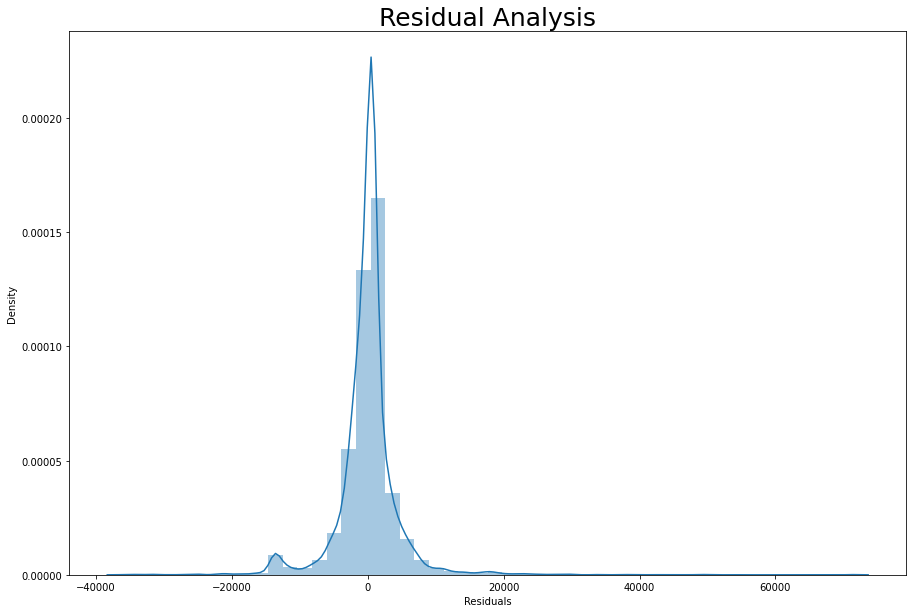

In [46]:
#distribution plot of residuals
plt.figure(figsize=(15,10))
y_train_prediction=salary_regression.predict(x_train)
residual=y_train - y_train_prediction
sb.distplot(residual)
plt.xlabel("Residuals")
plt.title("Residual Analysis",fontsize=25)
plt.show()

- residual terms are normally distributed with mean at 0, which is one of the assumption of Linear Regression 

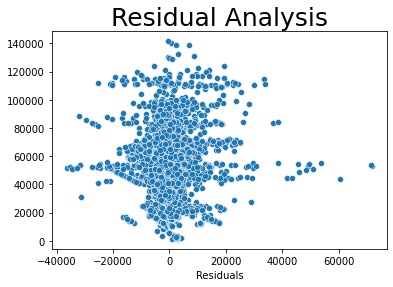

In [47]:
sb.scatterplot(x=residual,y=y_train_prediction)
plt.xlabel("Residuals")
plt.title("Residual Analysis",fontsize=25)
plt.show()

- residuals are independent of each other (another assumption of Linear Regression)

**the model generated can be used for salary prediction lets check coefficients and intercepts**

In [48]:
#print coef
print("coef are:",salary_regression.coef_)

#print intercept
print("intercept= ",salary_regression.intercept_)

coef are: [22395.65357851  2798.67752824 -1694.55993659   -22.59156434
   -62.65873076 -2049.21601256]
intercept=  39628.221303493134


In [49]:
#creating model evaluation and storing it in a string
model = str(salary_regression.intercept_)
for i in range(len(salary_regression.coef_)):
  model = model +" + " +(str(salary_regression.coef_[i])) + " * " +(str(x_train.columns[i]))
print(model)  

39628.221303493134 + 22395.65357851083 * JobTitle + 2798.6775282355707 * AgencyID + -1694.5599365882206 * Agency + -22.5915643428943 * HireDay + -62.65873075557511 * HireMonth + -2049.21601255778 * HireYear


#### <i><font color='Red' face='Cursive'>Observations from Model:</font></i>
 - Of all the features given  AgencyID,JobTitle and HireYear are the major driver for expaining the variance of Annual Salary as they have higher coefficient value.
 - Out of the above features, Hire Year is negatively related to Annual Salary which is same as we have seen while performing EDA.

In [50]:
#the end .....!!!